In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random


headers = { 
        'Connection': 'keep-alive',
        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3",
        "accept-language": "zh-CN,zh;q=0.9",
        "cache-control": "max-age=0",
        "cookie" : "td_cookie=3897495704; Hm_lvt_f48cedd6a69101030e93d4ef60f48fd0=1575472818; __51cke__=; bdshare_firstime=1575472817867; ASP.NET_SessionId=1osp1345liei23neojd03mb3; Hm_lpvt_f48cedd6a69101030e93d4ef60f48fd0=1575473066; __tins__4560568=%7B%22sid%22%3A%201575472817615%2C%20%22vd%22%3A%2017%2C%20%22expires%22%3A%201575474865997%7D; __51laig__=17",
        "host": "www.tianqihoubao.com",
        "sec-fetch-user": "?1",
        "upgrade-insecure-requests" : "1",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
}

def get_month_url(url):#得到所有的url
    response= requests.get(url,headers=headers)
    print(response)
    html = response.text
    mysout = BeautifulSoup(html,"lxml")
    div_1 = mysout.find('div',class_='wdetail')#所有年
    div_all = div_1.findAll('div',class_='box pcity')#12年
    href_all=[]#存储1每个月的地址
    for div in div_all:
        ul_all = div.findAll('ul')#三个季度 
        for ul in ul_all:
            li_all=ul.findAll('li')
            for li in li_all[1:]:
                aa= li.find('a')['href']
                href_all.append(aa)
    print(href_all)
    return href_all

def get_year_date(href_all):
    j=1
    i=0
    for url in href_all:
        url=url.lstrip('/lishi/')#删除/lishi/
        url="http://www.tianqihoubao.com/lishi/"+url
        print(url)
        response = requests.get(url,headers=headers)
        print(response)
        html = response.text
        mysout = BeautifulSoup(html,"lxml")
        table = mysout.find('table',class_='b')
        df = pd.read_html(table.prettify(),header=0)#读取表格
        if i==0:
            df[0].to_csv('广东2011-2019天气信息（2）.csv',encoding='utf-8-sig',mode='a')#存储
            i=i+1
        else:
            df[0].to_csv('广东2011-2019天气信息（2）.csv',header=None,encoding='utf-8-sig',mode='a')#存储
        print('爬完',j,"条")
        j=j+1
    print('已爬完,共'+j+"条网页信息")
        
    
if __name__=='__main__':
    url="http://www.tianqihoubao.com/lishi/guangzhou.html"
    href_all= get_month_url(url);
    get_year_date(href_all)

<Response [200]>
['/lishi/guangzhou/month/201101.html', '/lishi/guangzhou/month/201102.html', '/lishi/guangzhou/month/201103.html', '/lishi/guangzhou/month/201104.html', '/lishi/guangzhou/month/201105.html', '/lishi/guangzhou/month/201106.html', '/lishi/guangzhou/month/201107.html', '/lishi/guangzhou/month/201108.html', '/lishi/guangzhou/month/201109.html', '/lishi/guangzhou/month/201110.html', '/lishi/guangzhou/month/201111.html', '/lishi/guangzhou/month/201112.html', '/lishi/guangzhou/month/201201.html', '/lishi/guangzhou/month/201202.html', '/lishi/guangzhou/month/201203.html', '/lishi/guangzhou/month/201204.html', '/lishi/guangzhou/month/201205.html', '/lishi/guangzhou/month/201206.html', '/lishi/guangzhou/month/201207.html', '/lishi/guangzhou/month/201208.html', '/lishi/guangzhou/month/201209.html', '/lishi/guangzhou/month/201210.html', '/lishi/guangzhou/month/201211.html', '/lishi/guangzhou/month/201212.html', '/lishi/guangzhou/month/201301.html', '/lishi/guangzhou/month/201302.h

<Response [200]>
爬完 48 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201501.html
<Response [200]>
爬完 49 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201502.html
<Response [200]>
爬完 50 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201503.html
<Response [200]>
爬完 51 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201504.html
<Response [200]>
爬完 52 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201505.html
<Response [200]>
爬完 53 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201506.html
<Response [200]>
爬完 54 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201507.html
<Response [200]>
爬完 55 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201508.html
<Response [200]>
爬完 56 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201509.html
<Response [200]>
爬完 57 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201510.html
<Response [200]>
爬完 58 条
http://www.tianqihoubao.com/lishi/guangzhou/month/201511.html
<Response [200]>
爬完 59 条
http://www.tianqih

In [2]:
import pandas as pd

df = pd.read_csv('E:\data.csv',encoding="utf-8")
df.head(30)


,Unnamed: 0,日期,天气状况,气温,风力风向
0,0,2011年1月1日,晴 /多云,18℃ / 3℃,北风 3-4级 /北风 3-4级
1,1,2011年1月2日,多云 /多云,19℃ / 9℃,无持续风向 微风 /无持续风向 微风
2,2,2011年1月3日,小雨 /小雨,11℃ / 5℃,无持续风向 微风 /无持续风向 微风
3,3,2011年1月4日,小雨 /阴,8℃ / 5℃,无持续风向 微风 /无持续风向 微风
4,4,2011年1月5日,阴 /小雨,14℃ / 7℃,无持续风向 微风 /无持续风向 微风
5,5,2011年1月6日,小雨 /阴,9℃ / 4℃,北风 4-5级 /北风 3-4级
6,6,2011年1月7日,多云 /多云,12℃ / 5℃,北风 3-4级 /无持续风向 微风
7,7,2011年1月8日,多云 /多云,15℃ / 7℃,无持续风向 微风 /无持续风向 微风
8,8,2011年1月9日,多云 /阴,13℃ / 6℃,北风 3-4级 /北风 3-4级
9,9,2011年1月10日,阴 /小雨,12℃ / 5℃,北风 3-4级 /北风 3-4级


In [3]:
#添加“年”、"月"、”、“日”列
import re
year="年"
month="月"
day="日"
def get_date_year(date):
    date=str(date)[:date.index(year)]
    return int(date)
df['年']=df['日期'].map(get_date_year)

def get_date_month(date):
    date=str(date)[date.index(year)+1:date.index(month)]
    return int(date)
df['月']=df['日期'].map(get_date_month)

def get_date_day(date):
    date=str(date)[date.index(month)+1:date.index(day)]
    return int(date)
df['日']=df['日期'].map(get_date_day)
df.head(30)

,Unnamed: 0,日期,天气状况,气温,风力风向,年,月,日
0,0,2011年1月1日,晴 /多云,18℃ / 3℃,北风 3-4级 /北风 3-4级,2011,1,1
1,1,2011年1月2日,多云 /多云,19℃ / 9℃,无持续风向 微风 /无持续风向 微风,2011,1,2
2,2,2011年1月3日,小雨 /小雨,11℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,3
3,3,2011年1月4日,小雨 /阴,8℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,4
4,4,2011年1月5日,阴 /小雨,14℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,5
5,5,2011年1月6日,小雨 /阴,9℃ / 4℃,北风 4-5级 /北风 3-4级,2011,1,6
6,6,2011年1月7日,多云 /多云,12℃ / 5℃,北风 3-4级 /无持续风向 微风,2011,1,7
7,7,2011年1月8日,多云 /多云,15℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,8
8,8,2011年1月9日,多云 /阴,13℃ / 6℃,北风 3-4级 /北风 3-4级,2011,1,9
9,9,2011年1月10日,阴 /小雨,12℃ / 5℃,北风 3-4级 /北风 3-4级,2011,1,10


In [4]:
#添加”平均气温“,“最高温”，“最低温”列
str_1="℃  /"
str_2="℃"
def get_date_w(date):
    a=str(date)[:date.index(str_1)]
    b=str(date)[date.index(str_1)+6:]
    c=str(b)[:b.index(str_2)]
    date=(int(a)+int(c))/2
    return date
df['平均气温']=df['气温'].map(get_date_w)

def get_date_big(date):
    date=str(date)[:date.index(str_1)]
    return int(date)
df['最高气温']=df['气温'].map(get_date_big)

def get_date_l(date):
    b=str(date)[date.index(str_1)+6:]
    date=str(b)[:b.index(str_2)]
    return int(date)
df['最低气温']=df['气温'].map(get_date_l)
df.head(30)

,Unnamed: 0,日期,天气状况,气温,风力风向,年,月,日,平均气温,最高气温,最低气温
0,0,2011年1月1日,晴 /多云,18℃ / 3℃,北风 3-4级 /北风 3-4级,2011,1,1,10.5,18,3
1,1,2011年1月2日,多云 /多云,19℃ / 9℃,无持续风向 微风 /无持续风向 微风,2011,1,2,14.0,19,9
2,2,2011年1月3日,小雨 /小雨,11℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,3,8.0,11,5
3,3,2011年1月4日,小雨 /阴,8℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,4,6.5,8,5
4,4,2011年1月5日,阴 /小雨,14℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,5,10.5,14,7
5,5,2011年1月6日,小雨 /阴,9℃ / 4℃,北风 4-5级 /北风 3-4级,2011,1,6,6.5,9,4
6,6,2011年1月7日,多云 /多云,12℃ / 5℃,北风 3-4级 /无持续风向 微风,2011,1,7,8.5,12,5
7,7,2011年1月8日,多云 /多云,15℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,8,11.0,15,7
8,8,2011年1月9日,多云 /阴,13℃ / 6℃,北风 3-4级 /北风 3-4级,2011,1,9,9.5,13,6
9,9,2011年1月10日,阴 /小雨,12℃ / 5℃,北风 3-4级 /北风 3-4级,2011,1,10,8.5,12,5


In [5]:
#添加列“天气状况1”，和“天气状况2”
def get_date(date):
    date=date[:date.index("/")]
    return date
df['天气状况1']=df['天气状况'].map(get_date)

def get_date(date):
    date=date[date.index("/")+1:]
    return date
df['天气状况2']=df['天气状况'].map(get_date)
df.head(30)

,Unnamed: 0,日期,天气状况,气温,风力风向,年,月,日,平均气温,最高气温,最低气温,天气状况1,天气状况2
0,0,2011年1月1日,晴 /多云,18℃ / 3℃,北风 3-4级 /北风 3-4级,2011,1,1,10.5,18,3,晴,多云
1,1,2011年1月2日,多云 /多云,19℃ / 9℃,无持续风向 微风 /无持续风向 微风,2011,1,2,14.0,19,9,多云,多云
2,2,2011年1月3日,小雨 /小雨,11℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,3,8.0,11,5,小雨,小雨
3,3,2011年1月4日,小雨 /阴,8℃ / 5℃,无持续风向 微风 /无持续风向 微风,2011,1,4,6.5,8,5,小雨,阴
4,4,2011年1月5日,阴 /小雨,14℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,5,10.5,14,7,阴,小雨
5,5,2011年1月6日,小雨 /阴,9℃ / 4℃,北风 4-5级 /北风 3-4级,2011,1,6,6.5,9,4,小雨,阴
6,6,2011年1月7日,多云 /多云,12℃ / 5℃,北风 3-4级 /无持续风向 微风,2011,1,7,8.5,12,5,多云,多云
7,7,2011年1月8日,多云 /多云,15℃ / 7℃,无持续风向 微风 /无持续风向 微风,2011,1,8,11.0,15,7,多云,多云
8,8,2011年1月9日,多云 /阴,13℃ / 6℃,北风 3-4级 /北风 3-4级,2011,1,9,9.5,13,6,多云,阴
9,9,2011年1月10日,阴 /小雨,12℃ / 5℃,北风 3-4级 /北风 3-4级,2011,1,10,8.5,12,5,阴,小雨


[22.26027397260274, 22.53551912568306, 22.4986301369863, 22.702739726027396, 23.65753424657534, 23.241803278688526, 23.583791208791208, 23.293715846994534]


Text(0.5,1,'2011年-2018年的广州年平均气温折线图')

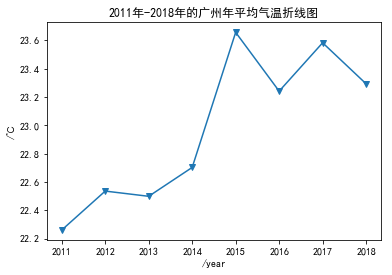

In [13]:
#2011年-2018年的广州年平均气温折线图
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(2011,2019)
y=[]
df_year=df.set_index('年')#修改索引
for year in x:
    a=df_year.loc[year]
    aa=a["平均气温"].mean()
    y.append(aa)
print(y)
#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(x,y,marker="v")
plt.xlabel('/year')
plt.ylabel('/℃')
plt.title("2011年-2018年的广州年平均气温折线图")

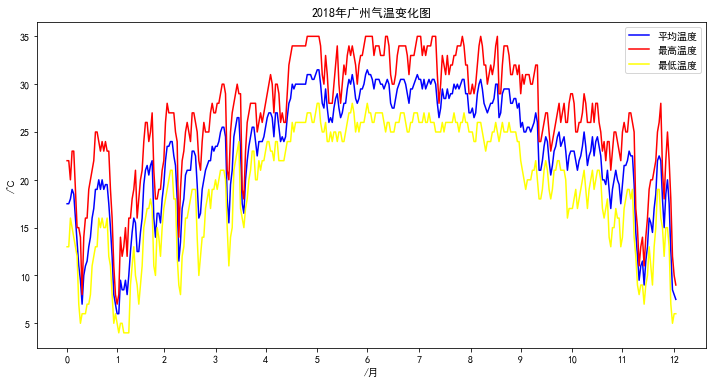

In [7]:
#2018年广州气温变化图
import numpy as np
import matplotlib.pyplot as plt
x= np.arange(1,367)
a=df_year.loc[2018]
y1=a["平均气温"]
y2=a["最高气温"]
y3=a["最低气温"]
#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
plt.plot(x,y1,color="blue",label="平均温度")
plt.plot(x,y2,color="red",label="最高温度")
plt.plot(x,y3,color="yellow",label="最低温度")
plt.xticks([1,31,59,90,120,151,181,212,243,273,304,334,365],['0','1','2','3','4','5','6','7','8','9','10','11','12'])
plt.legend()#画出lanel参数
plt.xlabel('/月')
plt.ylabel('/℃')
plt.title('2018年广州气温变化图')

plt.show()

In [52]:
df.head(30)


,Unnamed: 0,日期,天气状况,气温,风力风向,月,日,平均气温,最高气温,最低气温,天气状况1,天气状况2
年,,,,,,,,,,,,
2018,0,2018年1月1日,多云 /多云,22℃ / 13℃,无持续风向 <3级 /无持续风向 <3级,1,1,17.5,22,13,多云,多云
2018,1,2018年1月1日,多云 /多云,22℃ / 13℃,无持续风向 <3级 /无持续风向 <3级,1,1,17.5,22,13,多云,多云
2018,2,2018年1月2日,多云 /多云,20℃ / 16℃,无持续风向 <3级 /无持续风向 <3级,1,2,18.0,20,16,多云,多云
2018,3,2018年1月3日,多云 /阴,23℃ / 15℃,无持续风向 <3级 /无持续风向 <3级,1,3,19.0,23,15,多云,阴
2018,4,2018年1月4日,阴 /小雨,23℃ / 14℃,无持续风向 <3级 /北风 3～4级,1,4,18.5,23,14,阴,小雨
2018,5,2018年1月5日,阴 /小雨,19℃ / 13℃,无持续风向 <3级 /无持续风向 <3级,1,5,16.0,19,13,阴,小雨
2018,6,2018年1月6日,小雨-中雨 /中雨-大雨,15℃ / 12℃,无持续风向 <3级 /无持续风向 <3级,1,6,13.5,15,12,小雨-中雨,中雨-大雨
2018,7,2018年1月7日,中雨-大雨 /中雨,15℃ / 7℃,无持续风向 <3级 /北风 3～4级,1,7,11.0,15,7,中雨-大雨,中雨
2018,8,2018年1月8日,中雨 /小雨-中雨,14℃ / 5℃,北风 4～5级 /北风 3～4级,1,8,9.5,14,5,中雨,小雨-中雨


In [10]:
df_year=df.set_index('年')#修改索引
a=df_year.loc[year]
a1=a.groupby("天气状况1").count().reset_index()


In [11]:
a2=a.groupby("天气状况2").count().reset_index()

Text(0.5,1,'2018年广州天气状况柱形图')

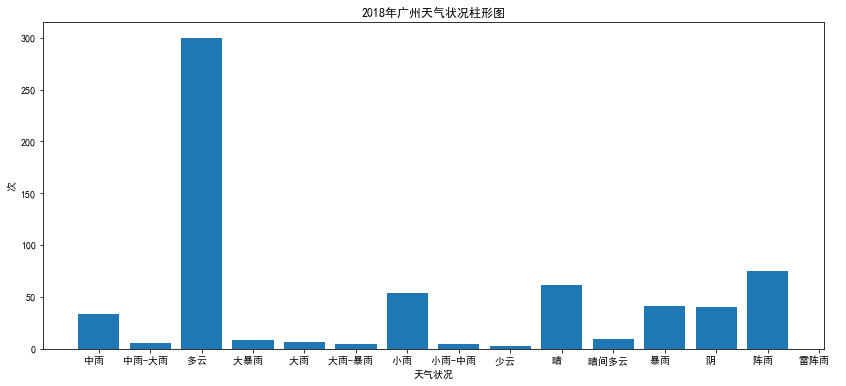

In [12]:
#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14,6))
plt.bar(a1["天气状况1"],a1["Unnamed: 0"]+a2["Unnamed: 0"])
plt.xlabel('天气状况')
plt.ylabel('次')
plt.title('2018年广州天气状况柱形图')